# Woodcock (Scolopax Minor) Migration:

### This notebook is used to preprocess the USGS woodcock migration data from movebank.org.  Another notebook is then used to demonstrate the use of imageio to make .mp4 and .gif files where the migration can be visualized.

### In the original migration study (Moore et al. 2021), birds patterns were tracked using GPS technology.  The study shed new light on the bird's migration patterns and ecology.  It also raises questions about the current management practices for this migratory bird.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

from datetime import datetime, timedelta

## Load and view the data

In [2]:
# Load the data
df = pd.read_csv("USGS Woodcock Migration.csv")

# Look at the data
df.head()

,event-id,visible,timestamp,location-long,location-lat,argos:altitude,argos:best-level,argos:calcul-freq,argos:iq,argos:lat1,...,argos:valid-location-algorithm,argos:valid-location-manual,behavioural-classification,manually-marked-outlier,migration-stage,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
0,1140038630,True,2015-10-18 16:59:44.000,-85.943337,43.686439,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,b15mipp01_01,NaN,b15mipp01_01a,gps,Scolopax minor,153195,MIPP01,USGS Woodcock Migration
1,1140038631,True,2015-10-21 17:01:52.000,-85.941414,43.688972,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,b15mipp01_01,NaN,b15mipp01_01a,gps,Scolopax minor,153195,MIPP01,USGS Woodcock Migration
2,1140038632,True,2015-10-24 16:59:44.000,-85.936653,43.697803,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,b15mipp01_01,NaN,b15mipp01_01a,gps,Scolopax minor,153195,MIPP01,USGS Woodcock Migration
3,1140038633,True,2015-10-27 17:01:52.000,-85.955261,43.688538,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,b15mipp01_01,NaN,b15mipp01_01a,gps,Scolopax minor,153195,MIPP01,USGS Woodcock Migration
4,1140038634,True,2015-10-30 16:59:44.000,-85.953575,43.687973,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,b15mipp01_01,NaN,b15mipp01_01a,gps,Scolopax minor,153195,MIPP01,USGS Woodcock Migration


## Clean the data - remove birds with low observation counts in the dataset.

In [3]:
# Drop birds with low observation count
df = df.groupby("individual-local-identifier").filter(lambda x: len(x) > 100)

# View remaining birds and their observation count
df['individual-local-identifier'].value_counts()

15LA04        1864
15TX01        1719
Woodcock 1    1311
15TX02        1219
16TX04        1123
16LA05        1003
16LA12         908
15MN02         832
16TX03         743
16LA11         663
15UP01         663
15MN01         658
16LA08         654
16LA09         602
Woodcock 4     545
15LA03         524
16LA03         521
Woodcock 5     502
15LA01         462
15LA08         403
15MI03         397
15MI01         396
15LA11         387
Woodcock 2     380
16LA04         341
Woodcock 7     335
15LA06         322
16TX01         316
15UP03         276
15LA10         254
15MI02         236
16LA01         232
16LA06         226
16LA10         171
15NJ01         171
16LA07         169
15TX06         166
15TX04         129
15NJ02         124
15TX05         114
15UP02         113
Name: individual-local-identifier, dtype: int64

## Get all birds on the same timestamp / prepare for plotting.

In [4]:
# Create dataframe with all birds on same timestamp

# Create common timestamp array with 1hr intervals
df['timestamp'] = pd.to_datetime(df.timestamp)
timearray = np.arange(df['timestamp'].min(), df['timestamp'].max(), timedelta(hours=1))
dfnew = pd.DataFrame(timearray, columns = ['timestamp'])
dfnew['dummy'] = 1     # Need a dummy so no datetime values are dropped in concatenation

# Get list of bird names
birds = df['individual-local-identifier'].unique()

# Cycle through bird names and add them to the dataframe
for i in birds:
    colname_lon = i + "_lon"
    colname_lat = i + "_lat"
    
    temp = df.loc[df['individual-local-identifier'] == i,
                  ["timestamp","location-long","location-lat"]]
    temp.columns = ["timestamp", colname_lon, colname_lat]
    
    dfnew = pd.concat([dfnew, temp])
    dfnew = dfnew.sort_values(by='timestamp').reset_index(drop=True)

dfnew = dfnew.drop(['dummy'], axis=1)
dfnew.head()

,timestamp,Woodcock 1_lon,Woodcock 1_lat,Woodcock 2_lon,Woodcock 2_lat,Woodcock 4_lon,Woodcock 4_lat,Woodcock 5_lon,Woodcock 5_lat,Woodcock 7_lon,...,16LA10_lon,16LA10_lat,16LA01_lon,16LA01_lat,16LA12_lon,16LA12_lat,16LA08_lon,16LA08_lat,16TX04_lon,16TX04_lat
0,2013-09-18 01:32:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-09-18 01:32:10,-94.709,46.734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-09-18 02:25:30,-95.624,47.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-09-18 02:32:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-09-18 02:53:06,-95.616,47.029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Interpolate to fill missing values in the dataframe.

### Here, we opt to use linear interpolation.  I'm no flat earther, but the distances between observations are typically small so the earth's curvature can be ignored.  It is important to reset the timestamp as the index for interpolation.

In [6]:
dfinterp = dfnew
dfinterp.index = dfinterp['timestamp']

for column in dfinterp.columns[1:]:
    dfinterp[column] = dfinterp[column].interpolate(method = 'time')

## Drop excess observations / get all data on a common 1hr interval.

In [7]:
# Remove intermediate timestamps - each row is spaced at a 1hr interval

dfinterp = dfinterp[(dfinterp.timestamp.dt.minute == 32) & (dfinterp.timestamp.dt.second == 10)]
dfinterp = dfinterp.drop_duplicates(subset='timestamp', keep='last')
dfinterp = dfinterp.reset_index(drop=True)

dfinterp.head()

,timestamp,Woodcock 1_lon,Woodcock 1_lat,Woodcock 2_lon,Woodcock 2_lat,Woodcock 4_lon,Woodcock 4_lat,Woodcock 5_lon,Woodcock 5_lat,Woodcock 7_lon,...,16LA10_lon,16LA10_lat,16LA01_lon,16LA01_lat,16LA12_lon,16LA12_lat,16LA08_lon,16LA08_lat,16TX04_lon,16TX04_lat
0,2013-09-18 01:32:10,-94.709000,46.734000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-09-18 02:32:10,-95.622068,47.009280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-09-18 03:32:10,-95.567860,47.008869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-09-18 04:32:10,-95.552149,47.033583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-09-18 05:32:10,-95.523433,47.058603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## View the data on the map:

### The small clusters are interesting - these indicate stopover points along the migration route where the birds hang out for a bit before moving on.

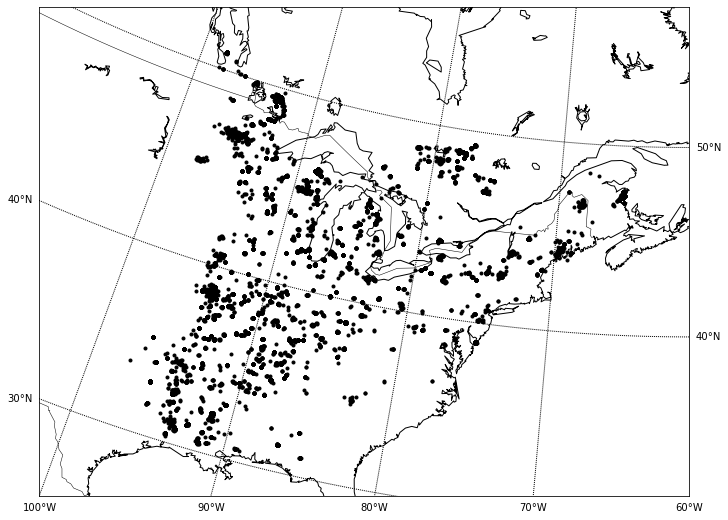

In [8]:
plt.figure(figsize=(12,9))
m = Basemap(llcrnrlon=-100., llcrnrlat=25., urcrnrlon=-60., urcrnrlat=57.,
           projection='lcc', lat_1=20., lat_2=40., lon_0=-60.,
           resolution='l', area_thresh=1000.)
m.drawcoastlines()
m.drawcountries()
m.drawparallels(np.arange(10,70,10), labels=[1,1,0,0])
m.drawmeridians(np.arange(-100,0,10), labels=[0,0,0,1])
m.scatter(df['location-long'].values, df['location-lat'].values, latlon=True, marker='.', color='k')
plt.show()

## Save the processed dataset.

In [9]:
dfinterp.to_csv('WoodcockData.csv', index=False)